# Notebook to work on auto- and cross-correlation for timing diagnostics

### Import libraries

In [1]:
import scipy.integrate as integrate
import numpy as np
from numpy import pi, sin, cos
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

### Basic constants

### Basic functions

Auto-correlation

In [2]:
def c_ff(f,tau): # calculates the auto-correlation coefficient c_ff, input is a function f and the delay tau
    if isinstance(tau,np.ndarray):
        result = []
        result_y = []
        for index in range(len(tau)):
            result.append(integrate.quad(lambda t: 1/(2*pi)*f(t)*f(float(tau[index]) + t),-pi,pi))
            result_y.append(result[index][0])
        
    else:
        result = (integrate.quad(lambda t: 1/(2*pi)*f(t)*f(float(tau) + t),-pi,pi))
        result_y = result[0]
        
    return result_y

def I_ff(f,tau): # calculates the auto-correlation in intensity I_ff, input is a function f and the delay tau
    if isinstance(tau,np.ndarray):
        result = []
        result_y = []
        for index in range(len(tau)):
            result.append(integrate.quad(lambda t: 1/(2*pi)*pow(f(t)*f(float(tau[index]) + t),2.0),-pi,pi))
            result_y.append(result[index][0])
        
    else:
        result = (integrate.quad(lambda t: 1/(2*pi)*pow(f(t)*f(float(tau) + t),2.0),-pi,pi))
        result_y = result[0]
        
    return result_y

Cross-Correlation

In [3]:
def c_fh(f,h,tau): # calculates the cross-correlation coefficient c_fh, input are functions f,h and the delay tau
    if isinstance(tau,np.ndarray):
        result = []
        result_y = []
        for index in range(len(tau)):
            result.append(integrate.quad(lambda t: 1/(2*pi)*f(t)*h(float(tau[index]) + t),-pi,pi))
            result_y.append(result[index][0])
        
    else:
        result = (integrate.quad(lambda t: 1/(2*pi)*f(t)*h(float(tau) + t),-pi,pi))
        result_y = result[0]
        
    return result_y


def I_fh(f,h,tau): # calculates the cross-correlation in intensity I_fh, input are functions f,h and the delay tau
    if isinstance(tau,np.ndarray):
        result = []
        result_y = []
        for index in range(len(tau)):
            result.append(integrate.quad(lambda t: 1/(2*pi)*pow(f(t)*h(float(tau[index]) + t),2.0),-pi,pi))
            result_y.append(result[index][0])
        
    else:
        result = (integrate.quad(lambda t: 1/(2*pi)*pow(f(t)*h(float(tau) + t),2.0),-pi,pi))
        result_y = result[0]
        
    return result_y

In [4]:
def gaussian(x, mu, sig): # a Gaussian function with x, the shift mu and the width sig
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def gaussian_para1(x): # a Gaussian without shift and width 1
    return gaussian(x,0,1)

### Some examples

Starting with auto-correlation of a sine function

Tau be between +-Pi.

Calculating the auto-correlation coefficient c_ff and the intensity I_ff for a sine function.

In [5]:
A1 = 1
tau1 = np.arange(-pi,pi,0.01*pi)
c_ff_1 = c_ff(sin,tau1)
I_ff_1 = I_ff(sin,tau1)

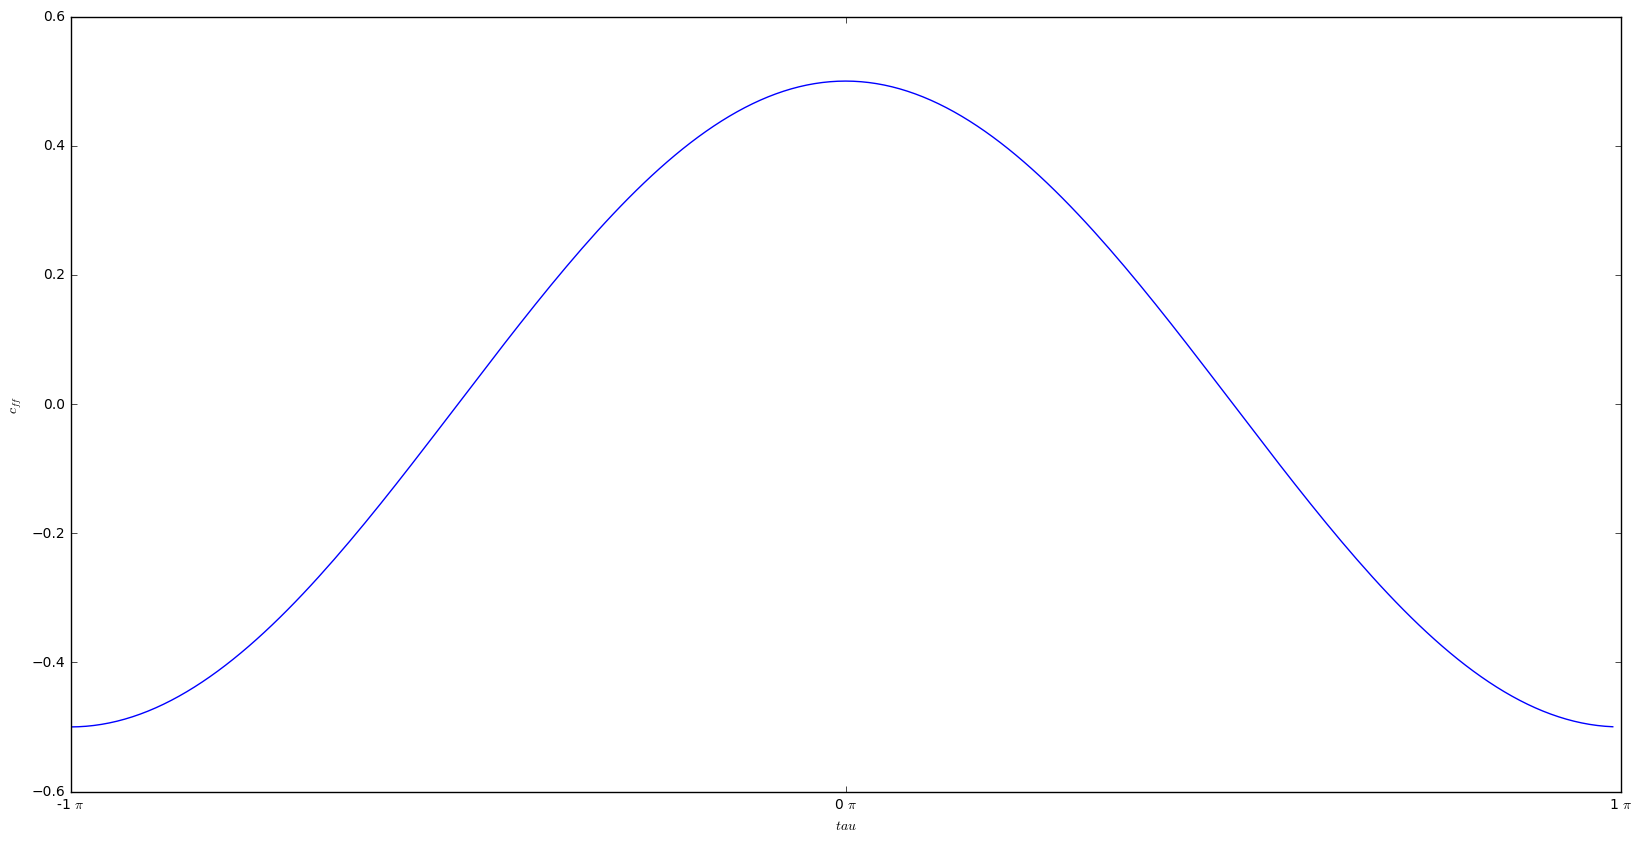

In [6]:

f,ax=plt.subplots(figsize=(20,10))

plt.plot(tau1/pi,c_ff_1)
plt.ylabel('$c_{ff}$')
plt.xlabel('${tau}$')

ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))

plt.style.use("ggplot")

plt.show()

Now the intensity auto-correlation:

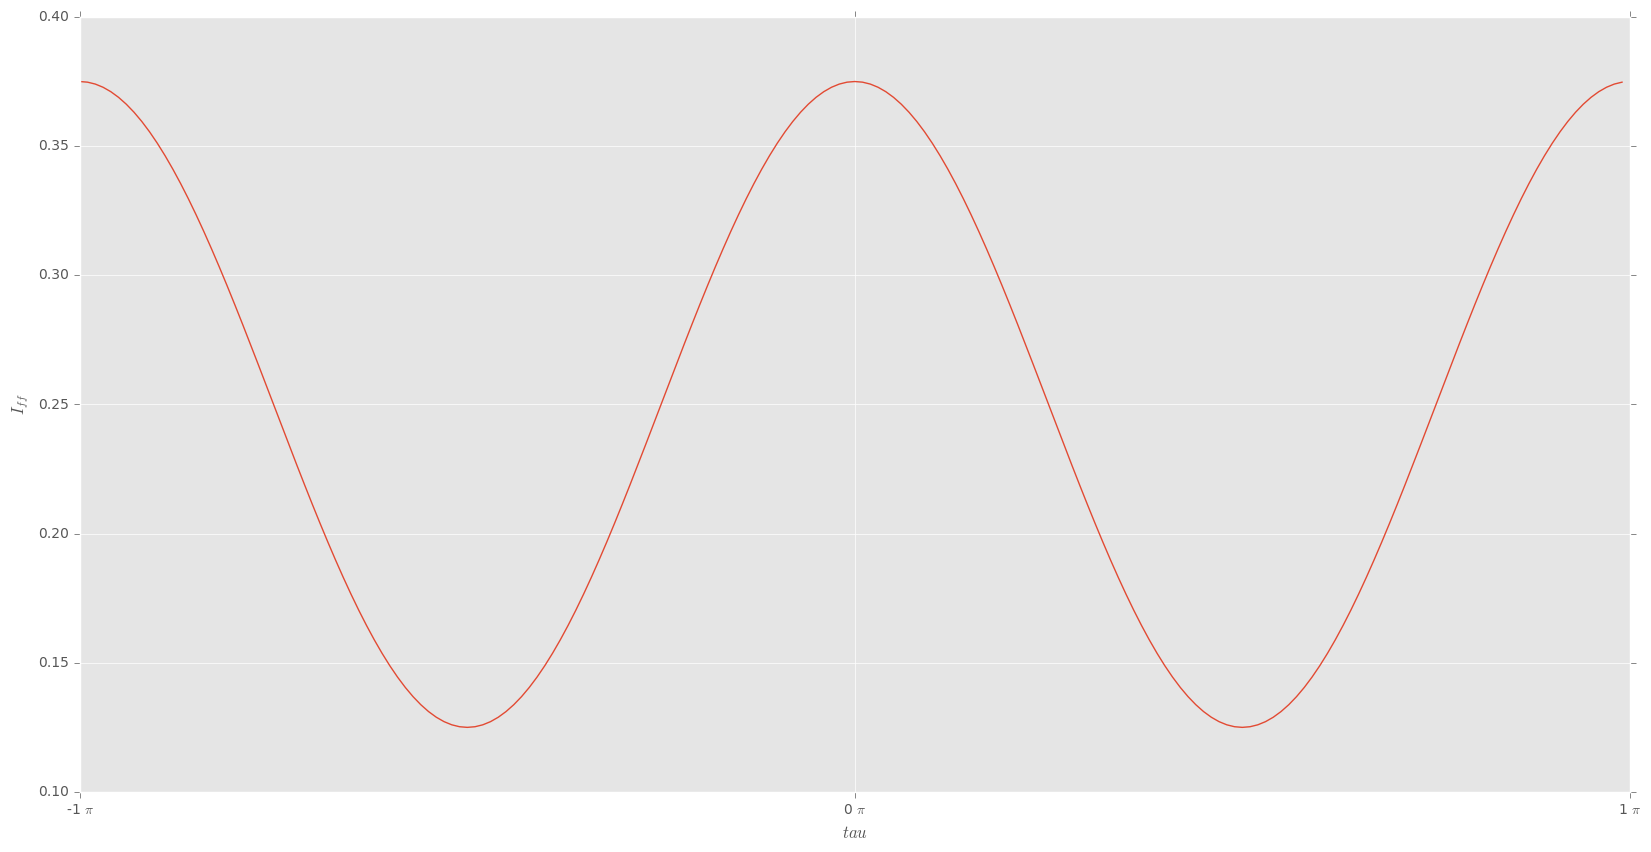

In [7]:

f,ax=plt.subplots(figsize=(20,10))

plt.plot(tau1/pi,I_ff_1)
plt.ylabel('$I_{ff}$')
plt.xlabel('${tau}$')

ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))

plt.style.use("ggplot")

plt.show()

Two Gaussian pulses

In [8]:
c_ff_gauss = c_ff(gaussian_para1,tau1)
I_ff_gauss = I_ff(gaussian_para1,tau1)

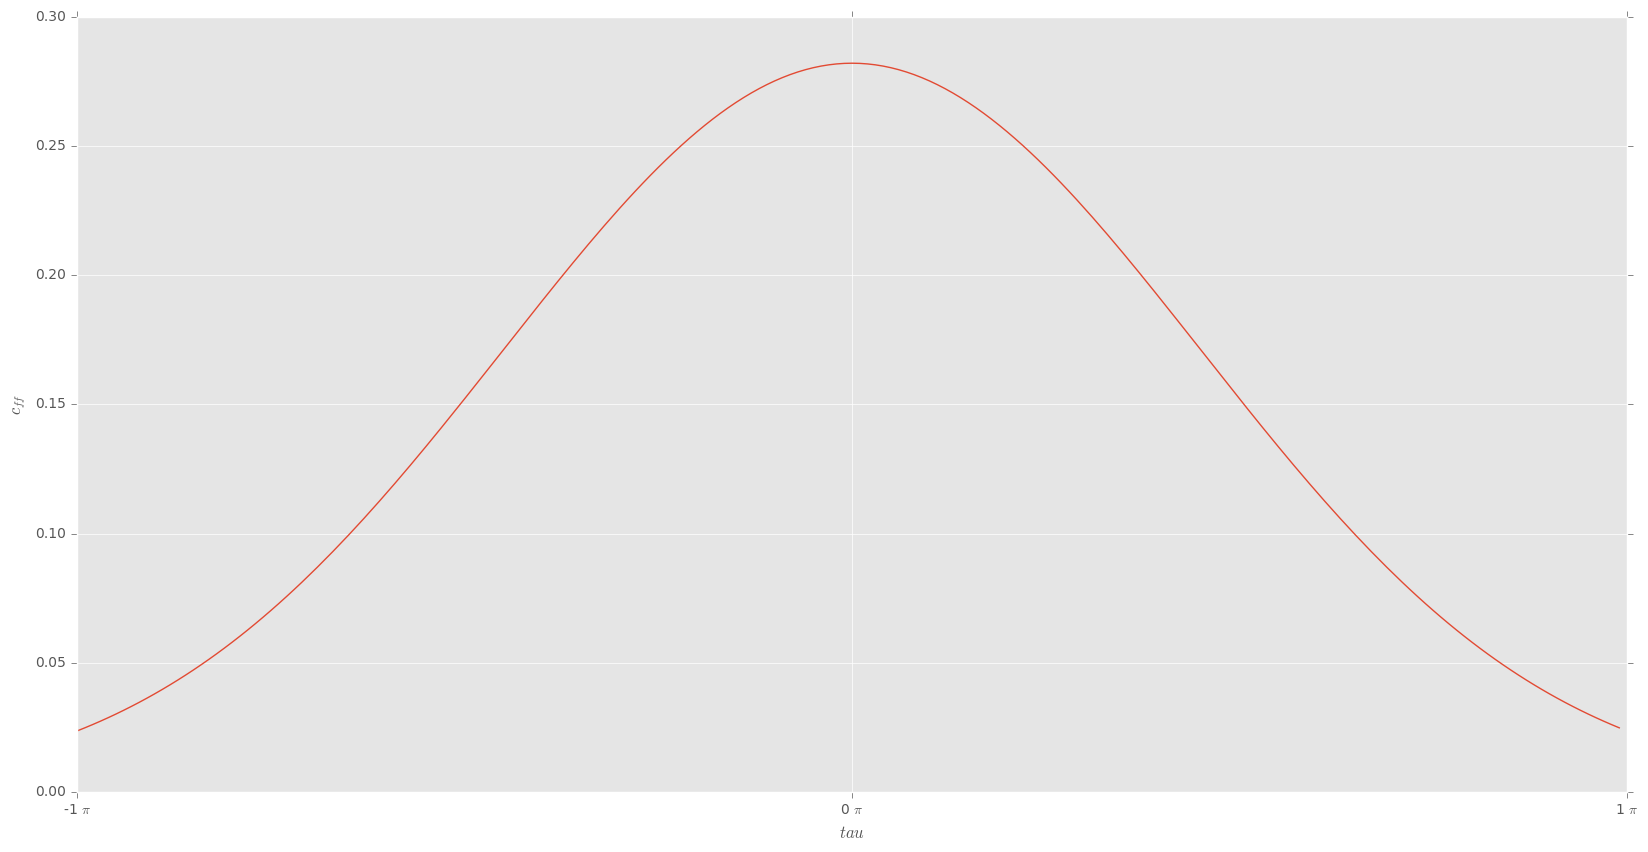

In [9]:

f,ax=plt.subplots(figsize=(20,10))

plt.plot(tau1/pi,c_ff_gauss)
plt.ylabel('$c_{ff}$')
plt.xlabel('${tau}$')

ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))

plt.style.use("ggplot")

plt.show()

The intensity auto-correlation:

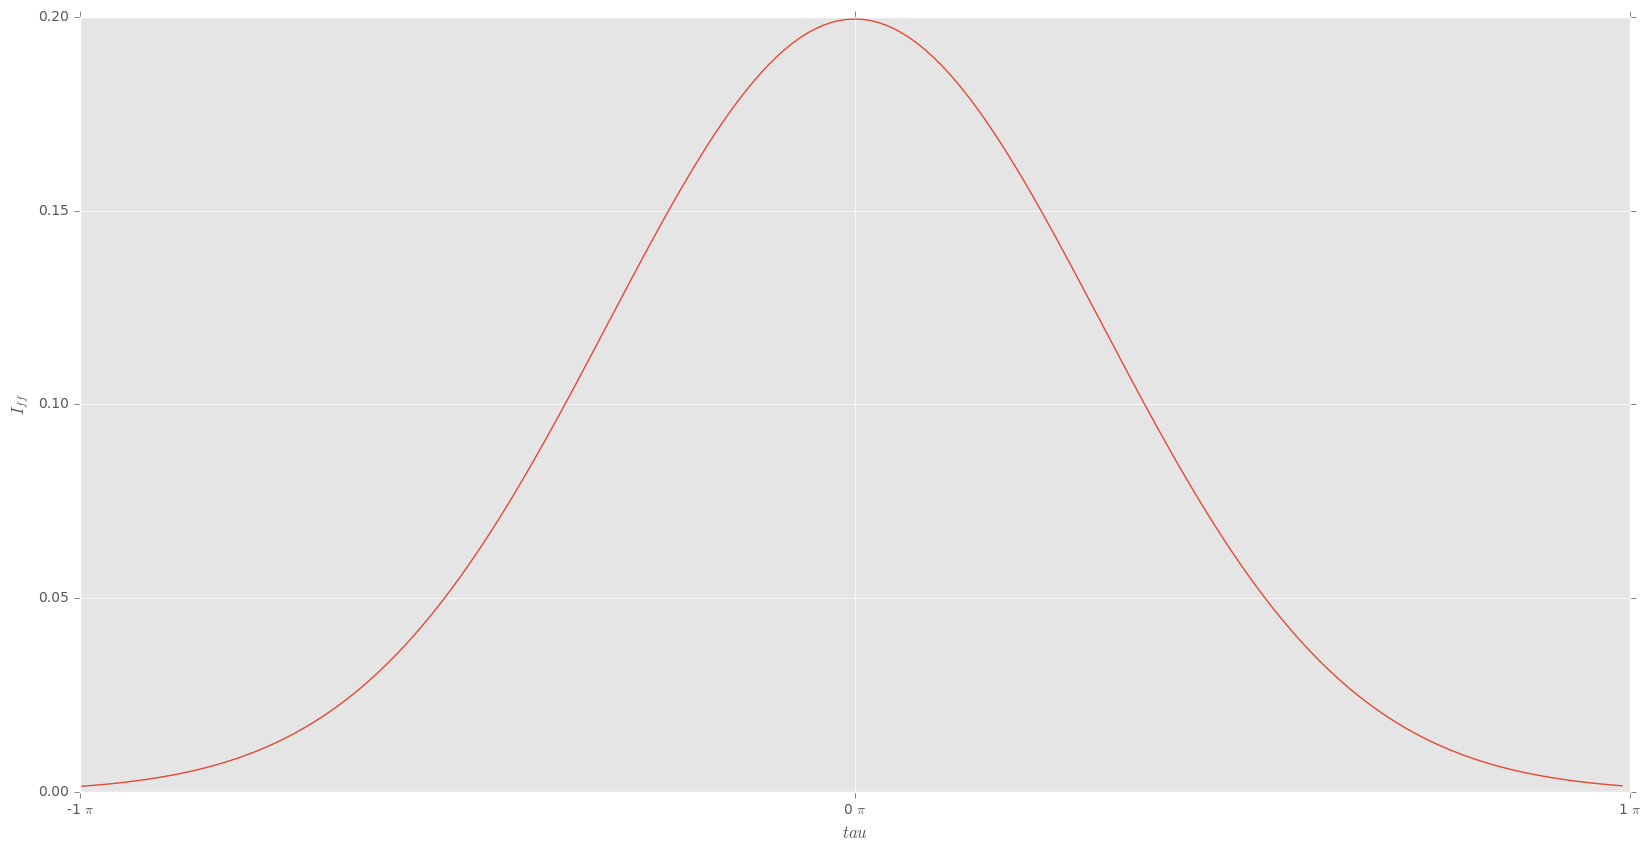

In [10]:
f,ax=plt.subplots(figsize=(20,10))

plt.plot(tau1/pi,I_ff_gauss)
plt.ylabel('$I_{ff}$')
plt.xlabel('${tau}$')

ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))

plt.style.use("ggplot")

plt.show()

Now cross-correlation using two different functions:

As first example the sine function with a Gaussian.

Sine is an odd function whilst a Gaussian is even, so the timing overlap will be a node.

In [11]:
c_fh_singauss = c_fh(sin,gaussian_para1,tau1)
I_fh_singauss = I_fh(sin,gaussian_para1,tau1)

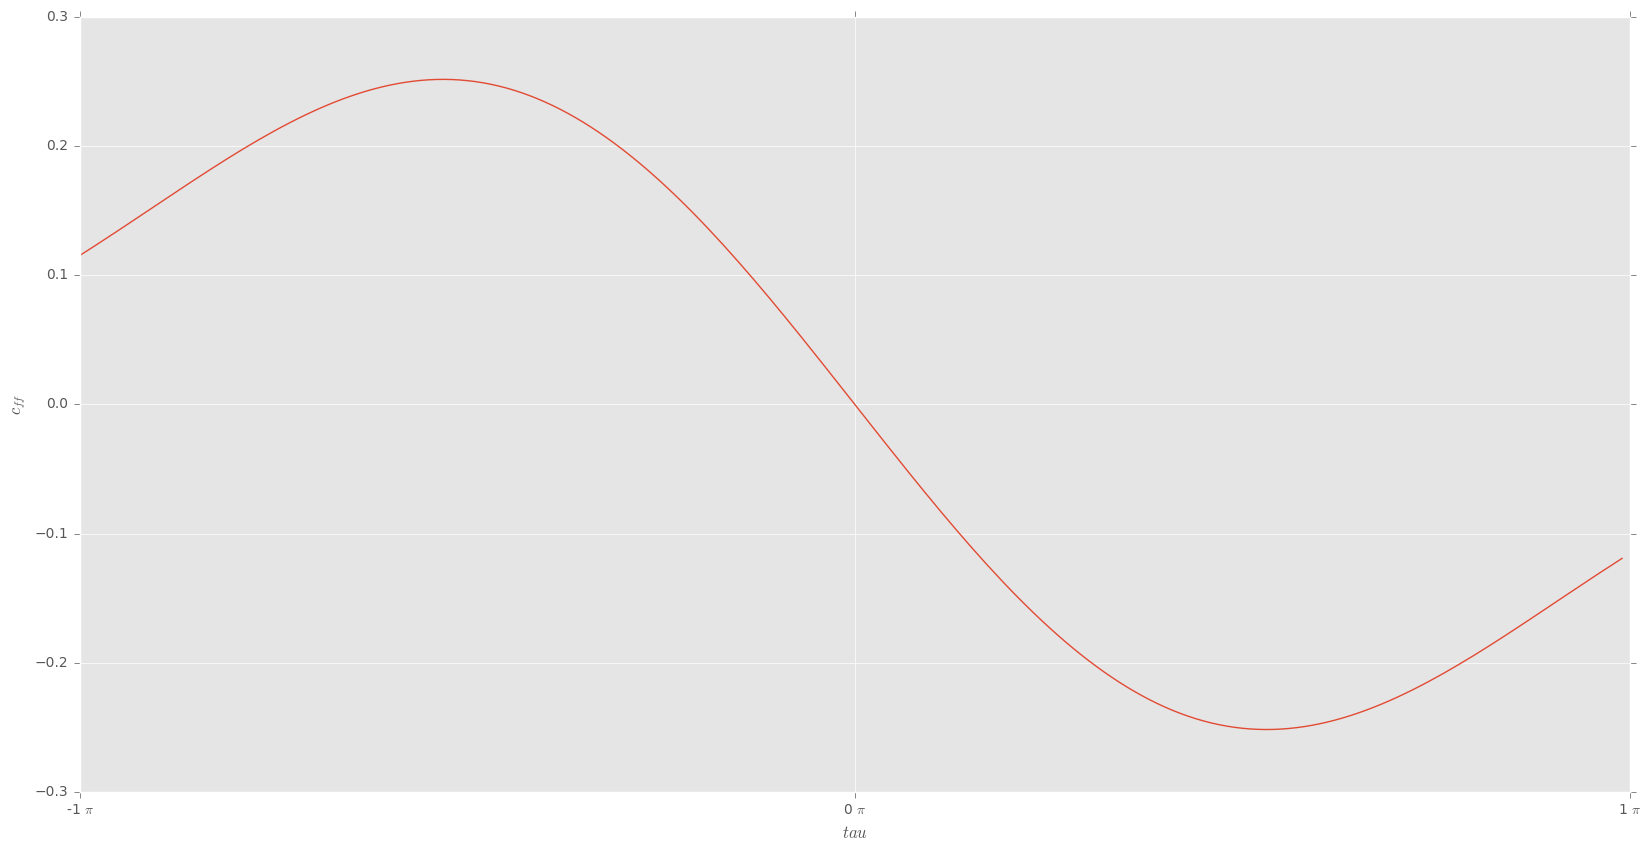

In [12]:

f,ax=plt.subplots(figsize=(20,10))

plt.plot(tau1/pi,c_fh_singauss)
plt.ylabel('$c_{ff}$')
plt.xlabel('${tau}$')

ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))

plt.style.use("ggplot")

plt.show()